# Yao-Chung Liang 1826630
ME 535 Winter 2020

Homework 4

### Due Tuesday 3/3

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
import pandas
pandas.__version__

'0.23.4'

__1)__ Consider the function $f(x)=\frac{sin(\pi x)}{1+x^2}$ on the interval $x \in [-10,10]$ discretized with a uniform grid of $N = 2^n$ points for `n in range(4,11)`.

Start by putting your calculus skills to work and find the analytical derivative $f'(x) = \frac{df}{dx}$.

Compute numerical versions of the derivative by the following methods:

- Fourier transform

- Finite (centered) difference with radius 1

- Finite (centered) difference with radius 2

Plot how the errors in the derivative values vary as a function of the number of grid points. Compare and contrast the errors and describe the conclusions you draw from your result.

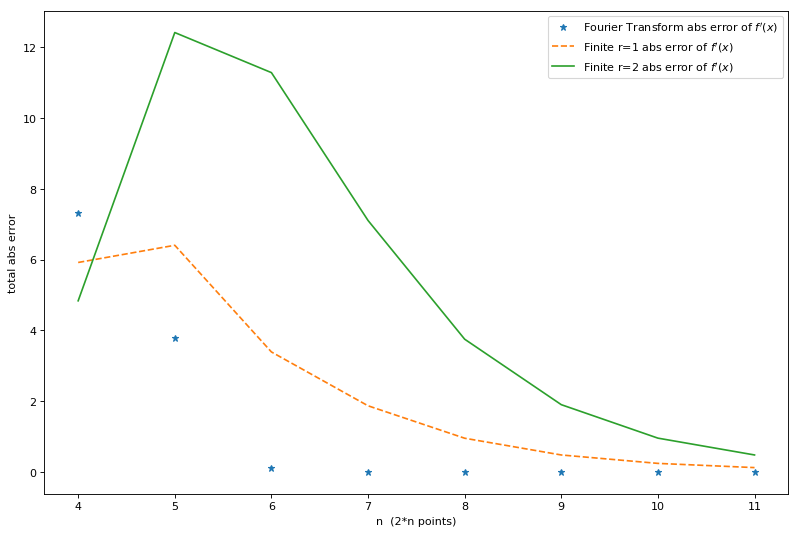

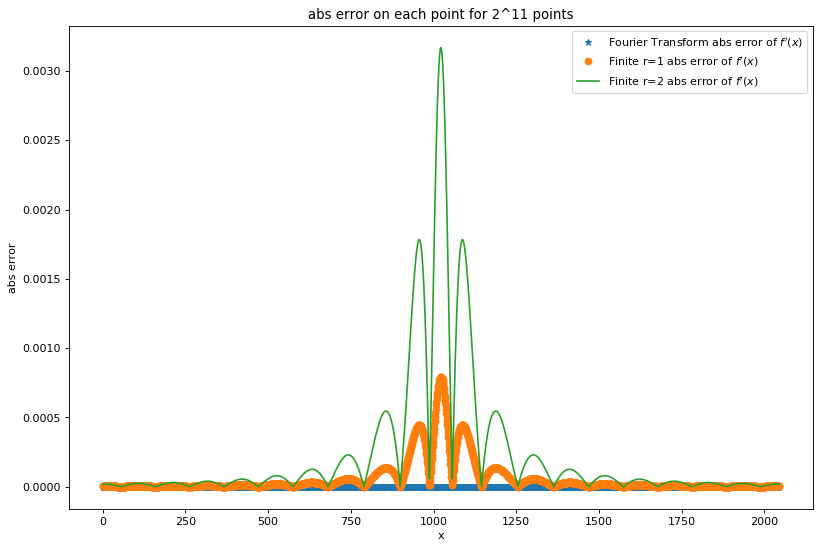

In [27]:
err_Fourier = []
err_Fin_r1 = []
err_Fin_r2 = []
L = 20

for N in range(4,12):
    n = 2**N
    x2=np.linspace(-L/2,L/2,n+1)
    dx = abs(x2[1]-x2[0])
    
    # construct Fourier Transform solution
    x=x2[:-1]
    u = np.sin(np.pi*x)/(1+x**2) # define the function
    ut = np.fft.fft(u) # compute the FFT
    k = (2*np.pi/L)*np.array([*range(int(n/2)), *range(int(-n/2),0,1)]) 
    df = 1j*k 
    ut1 = df*ut
    dudx_Fourier = np.fft.ifft(ut1)[2:-1]
    
    # construct the exact value
    dudx_exact = ((1+x2**2)*np.pi*np.cos(np.pi*x2)-np.sin(np.pi*x2)*2*x2)/((1+x2**2)**2)
    dudx_exact = dudx_exact[2:-2]
    
    # construct finite r = 1
    u = np.sin(np.pi*x2)/(1+x2**2)
    dudx_r1 = []
    for i in range(2,len(x2)-2):
        dudx_r1.append( (u[i+1]-u[i-1])/(2*dx) )
    
    # construct finite r = 2
    dudx_r2 = []
    for i in range(2,len(x2)-2):
        dudx_r2.append( (u[i+2]-u[i-2])/(4*dx) )
    
    tmp_err_Fourier = 0
    tmp_err_fin_r1 = 0
    tmp_err_fin_r2 = 0
    for i in range(len(dudx_exact)):
        tmp_err_Fourier += abs(dudx_exact[i]-dudx_Fourier[i])
        tmp_err_fin_r1 += abs(dudx_exact[i]-dudx_r1[i])
        tmp_err_fin_r2 += abs(dudx_exact[i]-dudx_r2[i])
        
    err_Fourier.append(tmp_err_Fourier)
    err_Fin_r1.append(tmp_err_fin_r1)
    err_Fin_r2.append(tmp_err_fin_r2)

N = [4,5,6,7,8,9,10,11]
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(N,err_Fourier,'*',label="Fourier Transform abs error of $f'(x)$")
plt.plot(N,err_Fin_r1,'--',label="Finite r=1 abs error of $f'(x)$")
plt.plot(N,err_Fin_r2, label="Finite r=2 abs error of $f'(x)$")
plt.xlabel('n  (2*n points)')
plt.ylabel('total abs error')
plt.legend()


#plt.figure()
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(abs(dudx_Fourier-dudx_exact),'*',label="Fourier Transform abs error of $f'(x)$")
#plt.plot(dudx_exact)
plt.plot(abs(dudx_r1-dudx_exact),'o',label="Finite r=1 abs error of $f'(x)$")
plt.plot(abs(dudx_r2-dudx_exact),'-',label="Finite r=2 abs error of $f'(x)$")
plt.xlabel('x')
plt.ylabel('abs error')
plt.title('abs error on each point for 2^11 points')
plt.legend()


### 1 Discussion
In the beginning, the abs error of derivative using finite central difference are smaller than that using Fourier transform. I think is because when there are not enough points, it makes the Fourier tansform hard to get more information about the periodicity of signal, thus the accuracy bacome lower for Fourier transform when sampling rate is low. 

When n = 2**5, the abs errors of derivative using finite central difference are higher. I think is because some of the points are too close to some peaks which means those area are not so smooth that using central difference method will have higher error.

In general, those abs error of derivative will get smaller while increasing the sampling rate, especially for Fourier transform since the higher sampling rate gives more information about the periodicity of the original signal.

__2a)__ For the function in problem 1 with $n=4$ ($N=2^4=16$), code up your own version of the array `DFT(N)` that performs the Discrete Fourier Transform (DFT) and the array `IDFT(N)` that performs the inverse DFT. 

__2b)__ Check if your version of the DFT agrees with the result of the "built-in" version in `numpy.fft`.

__2c)__ How well does your inverse DFT reproduce the original input function?

In [28]:
# 2a
import math
def my_exp(n):
    return complex(math.cos(n), math.sin(n))

def DFT(arr):
    n = len(arr)
    X = []
    for i in range(n):
        tmp = 0
        for k in range(n):
            tmp += arr[k] * my_exp(-2 * math.pi * i * k / n)
        X.append(tmp)
    return X

def IDFT(arr):
    n = len(arr)
    x = []
    for i in range(n):
        tmp = 0
        for k in range(n):
            tmp += arr[k] * my_exp(2 * math.pi * i * k / n)
        x.append(tmp/n)
    return x

Text(0, 0.5, 'abs error')

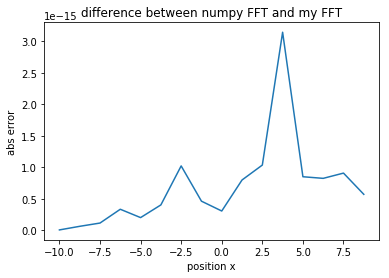

In [29]:
# 2b
L = 20 #set the finite domain size
N = 4
n = 2**N

x2=np.linspace(-L/2,L/2,n+1) #compute coordinates of grid points for n intervals
x=x2[:-1] #drop the last point: it is identified with first point by periodicity
u = np.sin(np.pi*x)/(1+x**2) # define the function
ut_np = np.fft.fft(u) # compute the FFT
ut_my = DFT(u)
'''
plt.figure()
plt.plot(x, ut_np, '*', label="  result of numpy FFT" )
plt.plot(x, ut_my, '-', label="  result of My FFT" )
plt.legend()
'''
FFT_error = []
for i in range(len(ut_np)):
    FFT_error.append(abs(ut_np[i]-ut_my[i]))

plt.figure()
plt.title('difference between numpy FFT and my FFT')
plt.plot(x,FFT_error)
plt.xlabel('position x')
plt.ylabel('abs error')

### 2b) Discussion
The difference of results between my FFT and numpy FFT is in the order of 10^(-15) which is quite small.

Text(0, 0.5, 'abs error')

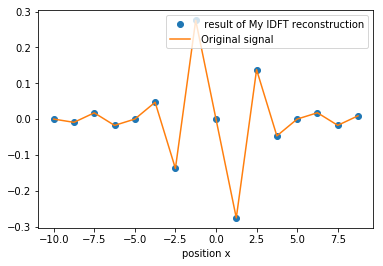

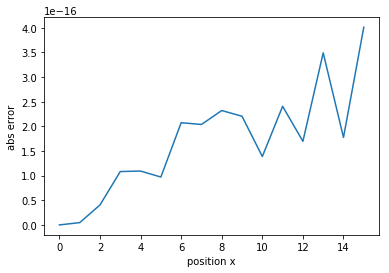

In [30]:
# 2c
L = 20 #set the finite domain size
N = 4
n = 2**N

x2=np.linspace(-L/2,L/2,n+1) #compute coordinates of grid points for n intervals
x=x2[:-1] #drop the last point: it is identified with first point by periodicity
u = np.sin(np.pi*x)/(1+x**2) # define the function
ut_np = np.fft.fft(u) # compute the FFT

#compute the corresponding discrete wavenumber
k = (2*np.pi/L)*np.array([*range(int(n/2)), *range(int(-n/2),0,1)]) # *range unpacks the range iterator and allows both to be concatenated in one line

df = 1j*k #'1j' is python for sqrt(-1) so 'df*' is "FFTish" for 'd/dx'
ut1_np = ut_np    #compute transform of 1st derivative

dudx_np = np.fft.ifft(ut1_np) #inverse FFT ut1 to get du/dx
dudx_my = IDFT(ut1_np)

plt.figure()
#plt.plot(x, dudx_np, '*', label="  result of numpy IDFT reconstruction" )
plt.plot(x, dudx_my, 'o', label="  result of My IDFT reconstruction" )
plt.plot(x, u, '-', label=" Original signal  " )
plt.xlabel('position x')
plt.legend()


FFT_error = []
for i in range(len(dudx_my)):
    FFT_error.append(abs(u[i]-dudx_my[i]))

plt.figure()
plt.plot(FFT_error)
plt.xlabel('position x')
plt.ylabel('abs error')

### 2C) Discussion
The difference between origianl signal and that of IDFT reconstruction is in order of 10^(-16) when n = 2**4 which is quite small.

__3)__ Consider the problem of heat conduction in a uniform aluminum bar that is insulated along its length and in contact with an ice bath at each end. The bar has the following dimensions:

Length = 20 cm, radius = 1 cm

and aluminum has the following material properties:


Property | Value|
---------|------|
Atomic Number | 13 ||
Atomic Weight (g/mol) | 26.98 |
Valency | 3 |
Crystal Structure | FCC |
Melting Point (°C) | 660.2 |
Boiling Point (°C) | 2480 |
Mean Specific Heat (0-100°C) (cal/g.°C)| 0.219 |
Thermal Conductivity (0-100°C) (cal/cms. °C) | 0.57 |
Co-Efficient of Linear Expansion (0-100°C) (x10-6/°C) | 23.5 |
Electrical Resistivity at 20°C (Ω.cm) | 2.69 |
Density (g/cm3) | 2.6898 |
Modulus of Elasticity (GPa) | 68.3 |
Poisson's Ratio | 0.34 |

Following the approach described in "heateqn_nondim.pdf", construct a nondimensionalized version of the problem (to be solved in problems 4-6).

For the remaining questions, implement a "method of lines" solution for the nondimensionalized system from problem 2 which should be of the form:
$$
\begin{equation}
\begin{split}
\text{PDE:} & \qquad &u_t = \kappa u_{xx} \\
\text{ICs:} & &u(x,0) = x (L-x) \\
\text{BCs:} & &u(0,t) = u(L,t) = 0 ; \; t>0
\end{split}
\end{equation}
$$

In each case, use a spatial grid with 50 equally spaced nodes and compute results over 100 timesteps.

__4a)__ Use forward Euler with with $\Delta t = 0.25 \Delta x$.

__4b)__ Use forward Euler with with $\Delta t = 1.25 \Delta x$.

__5)__ Use backward Euler with with $\Delta t = 1.25 \Delta x$.

__6a)__ Use the leapfrog method with with $\Delta t = 0.25 \Delta x$.

__6b)__ Use the leapfrog method with with $\Delta t = 1.25 \Delta x$.

In [31]:
def forward_euler_heatstep(u0, dx, dt,k):
    '''
    compute the array produced by a forward euler step
    
    Args:
        u0: 1D numpy array of current values
        dx: float spacing between nodes on the spatial grid
        dt: float time step
        k: thermal diffusivity
    Returns:
        v: 1D numpy array of updated values
    '''
    v = np.copy(u0)
    n = v.shape[0]
    lam = k*dt/(dx**2)
    for i in range(1,n-1):
        v[i]+=lam*(u0[i-1]-2*u0[i]+u0[i+1])
    return v
# 6a
def forward_euler_wave1way_step(u0, dx, dt, c):
    '''
    compute the array produced by a forward euler step from u
    '''
    v = np.copy(u0)
    n = v.shape[0]
    lam = c*dt/(dx*dx)
    for i in range(1,n-1):
        v[i]+=lam*(u0[i-1] + u0[i+1] -2*u0[i])
    return v

def forward_euler_wave1way_solve(x, t, ICs, c):
    '''
    compute solution of heat equation by forward euler/central diff.
    '''
    nx = x.shape[0]
    nt = t.shape[0]
    dx = (x[-1]-x[0])/(nx-1)
    dt = (t[-1]-t[0])/(nt-1)
    u = np.zeros([nt,nx])
    u[0] = ICs
    for k in range(1,nt):
        u[k] = forward_euler_wave1way_step(u[k-1], dx, dt, c)
    return u

def leapfrog_wave1way_step(u0, u1, dx, dt, c):
    '''
    compute the array produced by a forward euler step from u
    '''
    v = np.copy(u0)
    n = v.shape[0]
    lam = c*dt/(dx*dx)
    v[0], v[-1]= 0,0 #apply boundary conditions
    for i in range(1,n-1):
        v[i]= u0[i]+lam*(u1[i-1] + u1[i+1]-2*u1[i])
    return v

def leapfrog_wave1way_solve(x, t, ICs, c):
    '''
    compute solution of heat equation by forward euler/central diff.
    '''
    nx = x.shape[0]
    nt = t.shape[0]
    dx = (x[-1]-x[0])/(nx-1)
    dt = (t[-1]-t[0])/(nt-1)
    u = np.zeros([nt,nx])
    u[0] = ICs
    u[1] = forward_euler_wave1way_step( u[0], dx, dt, c)
    for k in range(2,nt):
        u[k] = leapfrog_wave1way_step( u[k-2], u[k-1], dx, dt, c)
    return u

def arraycontourplot(xvals, yvals, fvals, levels=[-1000,0], labels=['x','y'], 
    titlestring='', filled=False):
    """
    inputs:
    xvals: a 1d numpy array of values for the first coordinate
    yvals: a 1d numpy array of values for the second coordinate
    fvals: a 2d numpy array of function values on the coordinate grid
    levels: a list of contour values
    vars: a list containing the symbolic variables
    titlestring: a string specifying the plot title
    -----
    product: a contourplot based on the array of function values
    """
    fig = plt.figure()
    X,Y = np.meshgrid(yvals,xvals) #switch for more intuitive format
    if filled==True:
        cp = plt.contourf(X, Y, fvals, levels, hatches=['x','+']) #, linestyles='dashed')
    else:
        cp = plt.contour(X, Y, fvals, levels) #, linestyles='dashed')
    # plt.clabel(cp, inline=True, fontsize=10)
    plt.title(titlestring)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    #plt.axis('square')
    plt.axis('tight')
    plt.show()
    return cp

from mpl_toolkits import mplot3d

def myplot3d(x,t,sol):
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    X, Y = np.meshgrid(x, t)
    Z = sol #z_function(X, Y)

    #ax.plot_wireframe(X, Y, Z, color='green')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title("Solution: dt/dx**2= "+str(dt/dx**2));
    ax.view_init(20, -75) #elevation and azimuth (rotation around z-axis) for viewing
    plt.show()

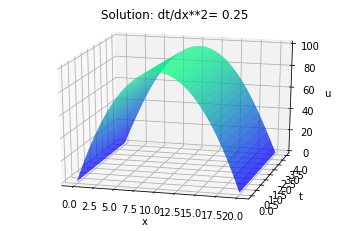

In [32]:
# 4a Use forward Euler with Δ𝑡=0.25Δ𝑥 
thermal_cond = 0.57


k = thermal_cond
L = 20
n = 50
t_step = 100
x = np.linspace(0,L,n+1)
dx = L/float(n)
dt = 0.25*dx*dx
u = [(L-x)*x]
t = np.linspace(0,dt*t_step,t_step+1)

for i in range(t_step):
    u.append(forward_euler_heatstep(u[-1], dx, dt, k ))

#arraycontourplot(t, x, u, labels=['x','Time'], levels=[0.1,0.3,0.5, 0.7,0.9], titlestring="Solution: dt/dx= "+str(dt/dx))
u = np.array(u)
myplot3d(x,t,u)


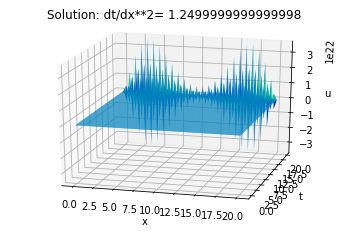

In [33]:
# 4b Use forward Euler with with  Δ𝑡=1.25Δ𝑥 
thermal_cond = 0.57


k = thermal_cond
L = 20
n = 50
t_step = 100
x = np.linspace(0,L,n+1)
dx = L/float(n)
dt = 1.25*dx*dx
u = [(L-x)*x]
t = np.linspace(0,dt*t_step,t_step+1)

for i in range(t_step):
    u.append(forward_euler_heatstep(u[-1], dx, dt, k ))

#arraycontourplot(t, x, u, labels=['x','Time'], levels=[0.1,0.3,0.5, 0.7,0.9], titlestring="Solution: dt/dx= "+str(dt/dx))
u = np.array(u)
m=-1
myplot3d(x[:],t[:m],u[:m,:])



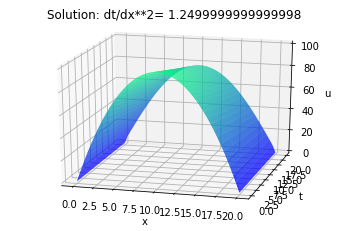

In [34]:
# 5 Use backward Euler with with  Δ𝑡=1.25Δ𝑥 .
from scipy.sparse import diags
import numpy as np
n = 50
alpha = diags([1, -2, 1], [-1, 0, 1], shape=(n+1, n+1)).todense()
I = np.identity(n+1)

thermal_cond = 0.57


k = thermal_cond
L = 20
t_step = 100
x = np.linspace(0,L,n+1)
dx = L/float(n)
dt = 1.25*dx*dx
u = [(L-x)*x]
t = np.linspace(0,dt*t_step,t_step+1)

for i in range(t_step):
    u.append(np.dot(np.linalg.inv(np.subtract(I,alpha*(k*dt/dx**2))),np.reshape(u[i],(-1, 1))))
    u[-1][0] = 0
    u[-1][-1] = 0
for i in range(t_step+1):
    u[i] = np.squeeze(np.asarray(u[i]))
    
#arraycontourplot(t, x, u, labels=['x','Time'], levels=[0.1,0.3,0.5, 0.7,0.9], titlestring="Solution: dt/dx= "+str(dt/dx))
u = np.array(u)
myplot3d(x,t,u)


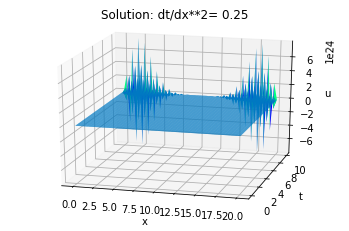

In [35]:
# 6a Use the leapfrog method with with  Δ𝑡=0.25Δ𝑥 .

thermal_cond = 0.57


c = thermal_cond
xmin, xmax, nx = 0, L, 50
x = np.linspace( xmin , xmax , nx+1) # compute the coordinates of the grid points
dx = (xmax-xmin)/nx # spacing between grid points
dt = 0.25*dx*dx
tmin, tmax, nt = 0, 0.25*100*dx, 100
t = np.linspace(tmin, tmax, nt+1) # compute the discrete time values
# dt = (tmax-tmin)/(nt-1)         # time step
u = np.zeros([nt,nx])             # initialize array of zeros to store u(x,t)
ICs = (L-x)*x                     # Gaussian initial conditions

#u[0] = ICs
sol = leapfrog_wave1way_solve(x, t, ICs, c)
#arraycontourplot(t, x, sol, labels=['x','Time'], levels=[0.1,0.3,0.5, 0.7,0.9], titlestring="Solution: dt/dx= "+str(dt/dx))

u = np.array(sol)
myplot3d(x,t,u)


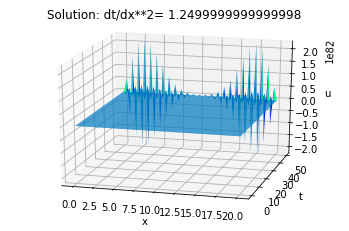

In [36]:
# 6b Use the leapfrog method with with  Δ𝑡=1.25Δ𝑥 .

thermal_cond = 0.57


c = thermal_cond
xmin, xmax, nx = 0, L, 50
x = np.linspace( xmin , xmax , nx+1) # compute the coordinates of the grid points
dx = (xmax-xmin)/nx # spacing between grid points
dt = 1.25*dx*dx
tmin, tmax, nt = 0, 1.25*100*dx, 100
t = np.linspace(tmin, tmax, nt+1) # compute the discrete time values
# dt = (tmax-tmin)/(nt-1) # time step
u = np.zeros([nt,nx]) # initialize array of zeros to store u(x,t)
ICs = (L-x)*x # Gaussian initial conditions

#u[0] = ICs
sol = leapfrog_wave1way_solve(x, t, ICs, c)
u = np.array(sol)
myplot3d(x,t,u)

### Discussion
1. I found results of (6a) and (6b) already showed that leapfrog method is unstable no matter what the time step size be as proved by note ch.9. 
2. For question (5), the backward method is always stable no matter what time step size is if the system is stable itself already( since the eigenvalues $\lambda$ would always be negative and time step $h$ is always positive, so $\lambda$$h$ would always stay in stable zone.)
3. For question (4a) and (4b), after testing several ratios of dt to dx\*dx, I found that the ratio under 0.91 would not diverge after 100 time steps. As the result shown, dt = 0.25\*dx^2 would converge but dt = 1.25\*dx^2 would diverge. 